In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.mnist

In [3]:
img_rows, img_cols = 28, 28
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

# Print out the images
Show the first 25 images and label them using a tring array

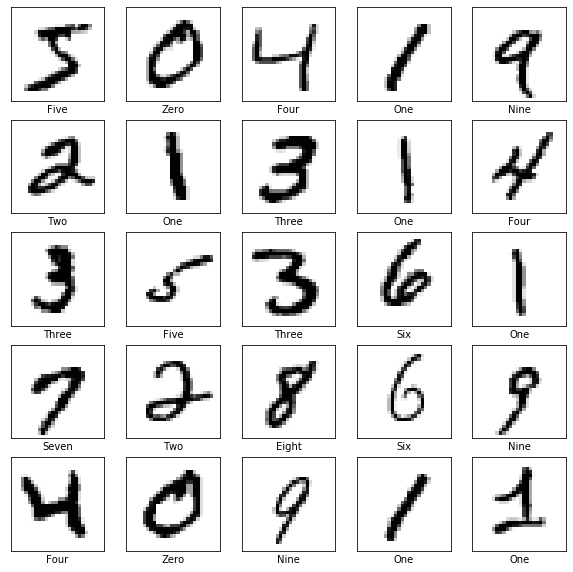

In [5]:
class_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
#reshape to 4 dim array
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#Normailise
train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

In [7]:
print(train_images.shape)
print(train_images.shape[0])
print(test_images.shape[0])

(60000, 28, 28, 1)
60000
10000


# Create the model and add layers

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(28, kernel_size=(3, 3), input_shape = input_shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.2082 - accuracy: 0.9370
Epoch 2/12
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.0735 - accuracy: 0.9770
Epoch 3/12
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.0465 - accuracy: 0.9850
Epoch 4/12
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0323 - accuracy: 0.9894
Epoch 5/12
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.0219 - accuracy: 0.9930
Epoch 6/12
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.0181 - accuracy: 0.9941
Epoch 7/12
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.0151 - accuracy: 0.9951
Epoch 8/12
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.0135 - accuracy: 0.9955
Epoch 9/12
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.0099 - accuracy: 0.9967
Epoch

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 8s - loss: 0.0479 - accuracy: 0.9823

Test accuracy: 0.9823


In [11]:
predictions = model.predict(test_images)

predictions[0]

print(predictions.shape)

np.argmax(predictions[0])
test_labels[0]

(10000, 10)


7

# Printing predictions

Print out the first 15 images and plot them,
displaying what they are versus what they were predicted to be.
If any of the predictions are wrong they would appear as a red bar on the graphs

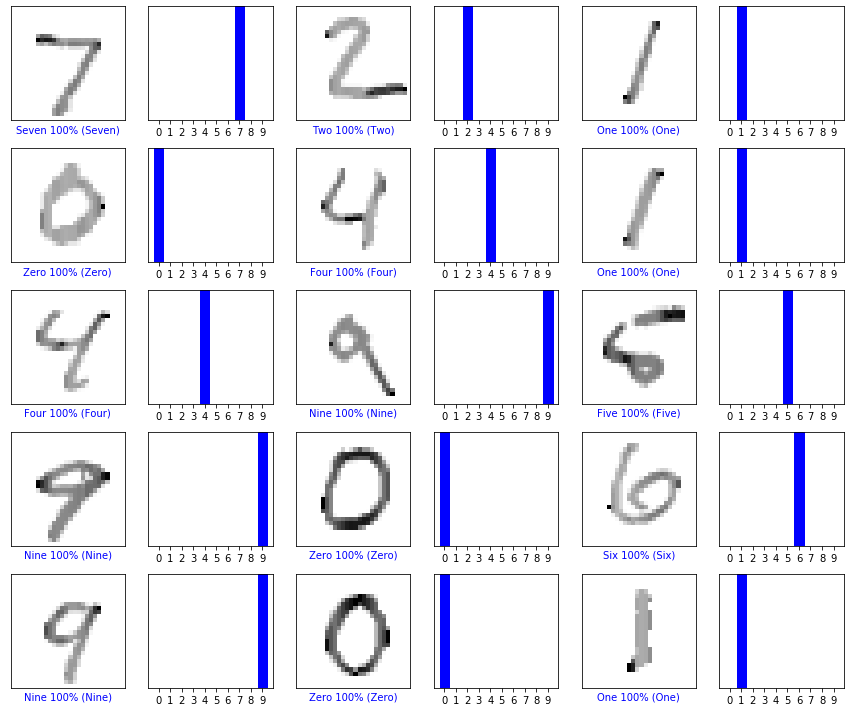

In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

[[1.7346622e-21 1.2763620e-13 1.0000000e+00 3.7629743e-17 1.2363375e-17
  3.2387666e-25 1.4479347e-19 3.2570268e-19 6.8058023e-20 1.8646144e-23]]


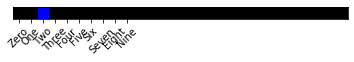

In [13]:
img = test_images[1]

img = (np.expand_dims(img, 0))

predictions_single = model.predict(img)

print(predictions_single)
plt.imshow(test_images[1].reshape(28,28), cmap="gray")

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [14]:
model.save("model.h5")